In [2]:
import numpy as np
import pandas as pd

In [3]:
bank_data = pd.read_csv(r'C:\Users\Shivam Singh Rajput\Desktop\kagle\bank_classification\bank_additional_full.csv')

In [4]:
bank_data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,False
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,False
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,False
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,False
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,False


In [5]:
bank_data.shape

(41188, 21)

In [6]:
bank_data.describe()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [7]:
bank_data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx',
       'cons_conf_idx', 'euribor3m', 'nr_employed', 'y'],
      dtype='object')

In [8]:
bank_data.y.value_counts()

False    36548
True      4640
Name: y, dtype: int64

In [9]:
cat_cols = ["job", "marital", "education", "default", "housing", "loan", "contact", "month", "day_of_week", "poutcome"]
numeric_columns = [i for i in bank_data.columns if not i in cat_cols + ["y"]]

In [10]:
numeric_columns

['age',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'emp_var_rate',
 'cons_price_idx',
 'cons_conf_idx',
 'euribor3m',
 'nr_employed']

In [11]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp_var_rate      41188 non-null float64
cons_price_idx    41188 non-null float64
cons_conf_idx     41188 non-null float64
euribor3m         41188 non-null float64
nr_employed       41188 non-null float64
y                 41188 non-null bool
dtypes: bool(1), float64(5), int64(5), object(10)
mem

In [12]:
len(cat_cols)

10

In [13]:
bank_data[numeric_columns] = bank_data[numeric_columns].astype(float)
bank_data[cat_cols] = bank_data[cat_cols].astype(object)

In [14]:
help(pd.get_dummies)

Help on function get_dummies in module pandas.core.reshape.reshape:

get_dummies(data, prefix=None, prefix_sep='_', dummy_na=False, columns=None, sparse=False, drop_first=False, dtype=None)
    Convert categorical variable into dummy/indicator variables
    
    Parameters
    ----------
    data : array-like, Series, or DataFrame
    prefix : string, list of strings, or dict of strings, default None
        String to append DataFrame column names.
        Pass a list with length equal to the number of columns
        when calling get_dummies on a DataFrame. Alternatively, `prefix`
        can be a dictionary mapping column names to prefixes.
    prefix_sep : string, default '_'
        If appending prefix, separator/delimiter to use. Or pass a
        list or dictionary as with `prefix.`
    dummy_na : bool, default False
        Add a column to indicate NaNs, if False NaNs are ignored.
    columns : list-like, default None
        Column names in the DataFrame to be encoded.
        

In [15]:
bank_data_dummies = pd.get_dummies(bank_data,drop_first=True)
bank_data_dummies.head()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,56.0,261.0,1.0,999.0,0.0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,1,0,0,0,1,0
1,57.0,149.0,1.0,999.0,0.0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,1,0,0,0,1,0
2,37.0,226.0,1.0,999.0,0.0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,1,0,0,0,1,0
3,40.0,151.0,1.0,999.0,0.0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,1,0,0,0,1,0
4,56.0,307.0,1.0,999.0,0.0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,1,0,0,0,1,0


In [16]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [17]:
scaler = MinMaxScaler(feature_range=(0, 1), copy=True)
bank_data_scaled = bank_data_dummies.copy()
bank_data_scaled[numeric_columns] = scaler.fit_transform(bank_data_dummies[numeric_columns])
bank_data_scaled.head()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,0.481481,0.053070,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,...,1,0,0,0,1,0,0,0,1,0
1,0.493827,0.030297,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,...,1,0,0,0,1,0,0,0,1,0
2,0.246914,0.045954,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,...,1,0,0,0,1,0,0,0,1,0
3,0.283951,0.030704,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,...,1,0,0,0,1,0,0,0,1,0
4,0.481481,0.062424,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,...,1,0,0,0,1,0,0,0,1,0


In [18]:
from sklearn.model_selection import train_test_split, GridSearchCV

In [19]:
X = bank_data_scaled.drop("y", axis = 1)
y = bank_data_scaled.y
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 2)

In [20]:
from sklearn.linear_model import LogisticRegressionCV

In [21]:
LR_clf_cv = LogisticRegressionCV(Cs=[10,1,0.1,100], random_state= 2)
LR_clf_cv.fit(X_train,y_train)
y_pred = LR_clf_cv.predict(X_test)
y_pred

C:\Users\Shivam Singh Rajput\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\Shivam Singh Rajput\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/li

array([False, False, False, ..., False, False, False])

In [22]:
y_pred_prob = LR_clf_cv.predict_proba(X_train) 

In [23]:
a = y_pred_prob[:,1]
a

array([0.00899852, 0.03007604, 0.01238554, ..., 0.00708658, 0.01314085,
       0.00887166])

In [24]:
from sklearn.metrics import roc_auc_score

In [25]:
y_train.shape

(30891,)

In [26]:

thresholds = [0.30,0.40,0.50,0.60,0.70,0.80,0.90]
for threshold in thresholds:
    y_pred_threshold = []
    for prob in a:
        if prob < threshold:
            y_pred_threshold.append(False)
        else:
            y_pred_threshold.append(True)
    auc_score = roc_auc_score(y_score=y_pred_threshold,y_true=y_train)
    print(auc_score)

0.7917653417282291
0.7416134011446146
0.7003993124660075
0.6569878143214509
0.6159802499740785
0.5761955848938591
0.540509336825309


In [27]:
len(y_pred_threshold)

30891

In [28]:
a

array([0.00899852, 0.03007604, 0.01238554, ..., 0.00708658, 0.01314085,
       0.00887166])

In [29]:
from sklearn.metrics import confusion_matrix,classification_report

In [30]:
confusion_matrix(y_pred=y_pred,y_true= y_test)

array([[8923,  221],
       [ 685,  468]], dtype=int64)

In [31]:
conf_mat = y_test.value_counts()

In [32]:
print(classification_report(y_pred=y_pred,y_true= y_test))

              precision    recall  f1-score   support

       False       0.93      0.98      0.95      9144
        True       0.68      0.41      0.51      1153

    accuracy                           0.91     10297
   macro avg       0.80      0.69      0.73     10297
weighted avg       0.90      0.91      0.90     10297



ROC CURVE

In [33]:
from sklearn.metrics import roc_auc_score, roc_curve

In [34]:
roc_auc_score(y_train, a, average='macro', sample_weight=None, max_fpr=None)

0.9360665134134388

In [35]:
fpr,tpr,threshold = roc_curve(y_train, a, pos_label=None, sample_weight=None, drop_intermediate=True)

In [36]:
import matplotlib.pyplot as plt

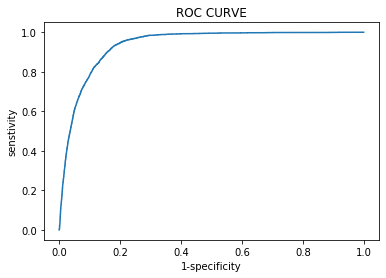

In [37]:
plt.plot(fpr,tpr)
plt.title("ROC CURVE")
plt.xlabel("1-specificity")
plt.ylabel("senstivity")
plt.show()

#sampling

In [38]:
from imblearn.under_sampling import RandomUnderSampler

C:\Users\Shivam Singh Rajput\Anaconda3\lib\site-packages\h5py\__init__.py:72: UserWarning: h5py is running against HDF5 1.10.2 when it was built against 1.10.3, this may cause problems
  '{0}.{1}.{2}'.format(*version.hdf5_built_version_tuple)
Using TensorFlow backend.


In [39]:
sampler = RandomUnderSampler()
X_rus, y_rus = sampler.fit_sample(X_train, y_train)

In [40]:
y_rus.value_counts()

True     3487
False    3487
Name: y, dtype: int64

In [41]:
y_train.value_counts()

False    27404
True      3487
Name: y, dtype: int64

In [42]:
LR_rus_cv = LogisticRegressionCV(Cs=[10,1,0.1,100], random_state= 2)
LR_rus_cv.fit(X_rus,y_rus)
y_pred = LR_rus_cv.predict(X_test)
y_pred

C:\Users\Shivam Singh Rajput\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\Shivam Singh Rajput\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/li

array([False, False,  True, ..., False, False, False])

In [43]:
y_pred_prob_rus = LR_rus_cv.predict_proba(X_rus) 

In [44]:
y_pred_prob_rus

array([[0.96282332, 0.03717668],
       [0.29451482, 0.70548518],
       [0.96343404, 0.03656596],
       ...,
       [0.71395844, 0.28604156],
       [0.13675654, 0.86324346],
       [0.00528821, 0.99471179]])

In [45]:
y_test.value_counts()

False    9144
True     1153
Name: y, dtype: int64

In [46]:
np.unique(y_pred,return_counts=True)

(array([False,  True]), array([8008, 2289], dtype=int64))

In [47]:
confusion_matrix(y_pred=y_pred,y_true= y_test)

array([[7872, 1272],
       [ 136, 1017]], dtype=int64)

In [48]:
print(classification_report(y_pred=y_pred,y_true= y_test))

              precision    recall  f1-score   support

       False       0.98      0.86      0.92      9144
        True       0.44      0.88      0.59      1153

    accuracy                           0.86     10297
   macro avg       0.71      0.87      0.75     10297
weighted avg       0.92      0.86      0.88     10297



In [49]:
from imblearn.over_sampling import RandomOverSampler

In [50]:
sampler = RandomOverSampler()
X_ros, y_ros = sampler.fit_sample(X_train, y_train)

In [51]:
y_ros.value_counts()

True     27404
False    27404
Name: y, dtype: int64

In [52]:
LR_ros_cv = LogisticRegressionCV(Cs=[10,1,0.1,100], random_state= 2)
LR_ros_cv.fit(X_ros,y_ros)
y_pred = LR_ros_cv.predict(X_test)
y_pred

C:\Users\Shivam Singh Rajput\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\Shivam Singh Rajput\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/li

array([False, False,  True, ..., False, False, False])

In [53]:
y_pred_prob_ros = LR_ros_cv.predict_proba(X_ros) 
y_pred_prob_ros

array([[0.97487344, 0.02512656],
       [0.91208026, 0.08791974],
       [0.97316472, 0.02683528],
       ...,
       [0.46147628, 0.53852372],
       [0.54780172, 0.45219828],
       [0.40881504, 0.59118496]])

In [54]:
confusion_matrix(y_pred=y_pred,y_true= y_test)

array([[7870, 1274],
       [ 124, 1029]], dtype=int64)

In [55]:
print(classification_report(y_pred=y_pred,y_true= y_test))

              precision    recall  f1-score   support

       False       0.98      0.86      0.92      9144
        True       0.45      0.89      0.60      1153

    accuracy                           0.86     10297
   macro avg       0.72      0.88      0.76     10297
weighted avg       0.92      0.86      0.88     10297



In [56]:
from imblearn.over_sampling import SMOTE

In [57]:
sampler = SMOTE()
X_smote, y_smote = sampler.fit_sample(X_train, y_train)

In [58]:
y_ros.value_counts()

True     27404
False    27404
Name: y, dtype: int64

In [59]:
LR_smote_cv = LogisticRegressionCV(Cs=[10,1,0.1,100], random_state= 2)
LR_smote_cv.fit(X_smote,y_smote)
y_pred = LR_smote_cv.predict(X_test)
y_pred

C:\Users\Shivam Singh Rajput\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\Shivam Singh Rajput\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/li

C:\Users\Shivam Singh Rajput\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


array([False, False, False, ..., False, False, False])

In [60]:
y_pred_prob_smote = LR_smote_cv.predict_proba(X_smote) 
y_pred_prob_smote

array([[0.98537147, 0.01462853],
       [0.98628898, 0.01371102],
       [0.97678103, 0.02321897],
       ...,
       [0.12797158, 0.87202842],
       [0.45298314, 0.54701686],
       [0.10510392, 0.89489608]])

In [69]:
confusion_matrix = confusion_matrix(y_pred=y_pred,y_true= y_test)

In [70]:
confusion_matrix

array([[8227,  917],
       [ 320,  833]], dtype=int64)

In [73]:
   confusion_matrix[1][0]

320

In [75]:
def error_metrics(confusion_matrix):
    true_negative = confusion_matrix[0][0]
    true_positive = confusion_matrix[1][1]
    false_positive = confusion_matrix[1][0]
    false_negative = confusion_matrix[0][1]
    total = true_positive + true_negative + false_positive + false_negative
    accuracy = (true_positive + true_negative)/total
    precision = true_positive/(true_positive + false_positive)
    recall = true_positive/(true_positive + false_negative)
    f1_score = (2*precision*recall)/(precision + recall)
    print("accuracy: ",accuracy)
    print("precision: ",precision)
    print("recall: ",recall)
    print("f1_score: ",f1_score)



In [76]:
error_metrics(confusion_matrix)

accuracy:  0.8798679226959308
precision:  0.7224631396357328
recall:  0.476
f1_score:  0.5738890802617981


In [77]:
print(classification_report(y_pred=y_pred,y_true= y_test))

              precision    recall  f1-score   support

       False       0.96      0.90      0.93      9144
        True       0.48      0.72      0.57      1153

    accuracy                           0.88     10297
   macro avg       0.72      0.81      0.75     10297
weighted avg       0.91      0.88      0.89     10297



SVM

In [63]:
from sklearn import svm

In [64]:
svc = svm.SVC()

In [65]:
svc.fit(X_smote,y_smote)
y_pred = svc.predict(X_test)
y_pred

array([False, False, False, ..., False, False, False])

In [66]:
confusion_matrix(y_pred=y_pred,y_true= y_test)

array([[8227,  917],
       [ 320,  833]], dtype=int64)

In [67]:
print(classification_report(y_pred=y_pred,y_true= y_test))

              precision    recall  f1-score   support

       False       0.96      0.90      0.93      9144
        True       0.48      0.72      0.57      1153

    accuracy                           0.88     10297
   macro avg       0.72      0.81      0.75     10297
weighted avg       0.91      0.88      0.89     10297



In [68]:
help(svm.SVC)

Help on class SVC in module sklearn.svm._classes:

class SVC(sklearn.svm._base.BaseSVC)
 |  SVC(C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape='ovr', break_ties=False, random_state=None)
 |  
 |  C-Support Vector Classification.
 |  
 |  The implementation is based on libsvm. The fit time scales at least
 |  quadratically with the number of samples and may be impractical
 |  beyond tens of thousands of samples. For large datasets
 |  consider using :class:`sklearn.svm.LinearSVC` or
 |  :class:`sklearn.linear_model.SGDClassifier` instead, possibly after a
 |  :class:`sklearn.kernel_approximation.Nystroem` transformer.
 |  
 |  The multiclass support is handled according to a one-vs-one scheme.
 |  
 |  For details on the precise mathematical formulation of the provided
 |  kernel functions and how `gamma`, `coef0` and `degree` affect each
 |  oth